In [2]:
import pandas as pd

In [3]:
model_id = 18
combined_file_path = f"processed_trajectories/combined_m{model_id}_db.pkl"
df = pd.read_pickle(combined_file_path)


In [ ]:
df['model'].value_counts()

model
mistral-large                             145
llama-3-405b-instruct                     145
llama-3-3-70b-instruct                    145
llama-4-maverick-17b-128e-instruct-fp8    125
llama-4-scout-17b-16e-instruct            111
gpt-4.1-2025-04-14                        105
granite-3-3-8b-instruct                   105
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   model_id                               881 non-null    int64 
 1   counter                                881 non-null    int64 
 2   timestamp                              881 non-null    object
 3   vendor                                 881 non-null    object
 4   model                                  881 non-null    object
 5   ut_id                                  881 non-null    object
 6   addi_fm_cnt                            881 non-null    int64 
 7   addi_fm_list                           881 non-null    object
 8   1.1 Disobey Task Specification         881 non-null    bool  
 9   1.2 Disobey Role Specification         881 non-null    bool  
 10  1.3 Step Repetition                    881 non-null    bool  
 11  1.4 Loss of Convers

In [5]:
failure_mode_keys = [
    "1.1 Disobey Task Specification",
    "1.2 Disobey Role Specification",
    "1.3 Step Repetition",
    "1.4 Loss of Conversation History",
    "1.5 Unaware of Termination Conditions",
    "2.1 Conversation Reset",
    "2.2 Fail to Ask for Clarification",
    "2.3 Task Derailment",
    "2.4 Information Withholding",
    "2.5 Ignored Other Agent's Input",
    "2.6 Action-Reasoning Mismatch",
    "3.1 Premature Termination",
    "3.2 No or Incorrect Verification",
    "3.3 Weak Verification",
]


In [6]:
for col in failure_mode_keys:
    print(f"Distribution for '{col}':")
    print(df[col].value_counts(dropna=False))
    print()

Distribution for '1.1 Disobey Task Specification':
1.1 Disobey Task Specification
False    619
True     262
Name: count, dtype: int64

Distribution for '1.2 Disobey Role Specification':
1.2 Disobey Role Specification
False    879
True       2
Name: count, dtype: int64

Distribution for '1.3 Step Repetition':
1.3 Step Repetition
False    571
True     310
Name: count, dtype: int64

Distribution for '1.4 Loss of Conversation History':
1.4 Loss of Conversation History
False    881
Name: count, dtype: int64

Distribution for '1.5 Unaware of Termination Conditions':
1.5 Unaware of Termination Conditions
False    749
True     132
Name: count, dtype: int64

Distribution for '2.1 Conversation Reset':
2.1 Conversation Reset
False    881
Name: count, dtype: int64

Distribution for '2.2 Fail to Ask for Clarification':
2.2 Fail to Ask for Clarification
False    688
True     193
Name: count, dtype: int64

Distribution for '2.3 Task Derailment':
2.3 Task Derailment
False    799
True      82
Name: cou

In [23]:
# Create the summary table with True/False counts
fm_summary_df = df[failure_mode_keys].apply(pd.Series.value_counts).T

# Rename columns for clarity
fm_summary_df.columns = ['False Count', 'True Count']

# Reset index and rename the column to 'Failure Mode'
fm_summary_df = fm_summary_df.reset_index().rename(columns={'index': 'Failure Mode'})

In [8]:
fm_summary_df.to_csv('summary/fm_summary.csv', index=False)

In [11]:
fm_summary_df.columns

Index(['Failure Mode', 'False Count', 'True Count'], dtype='object')

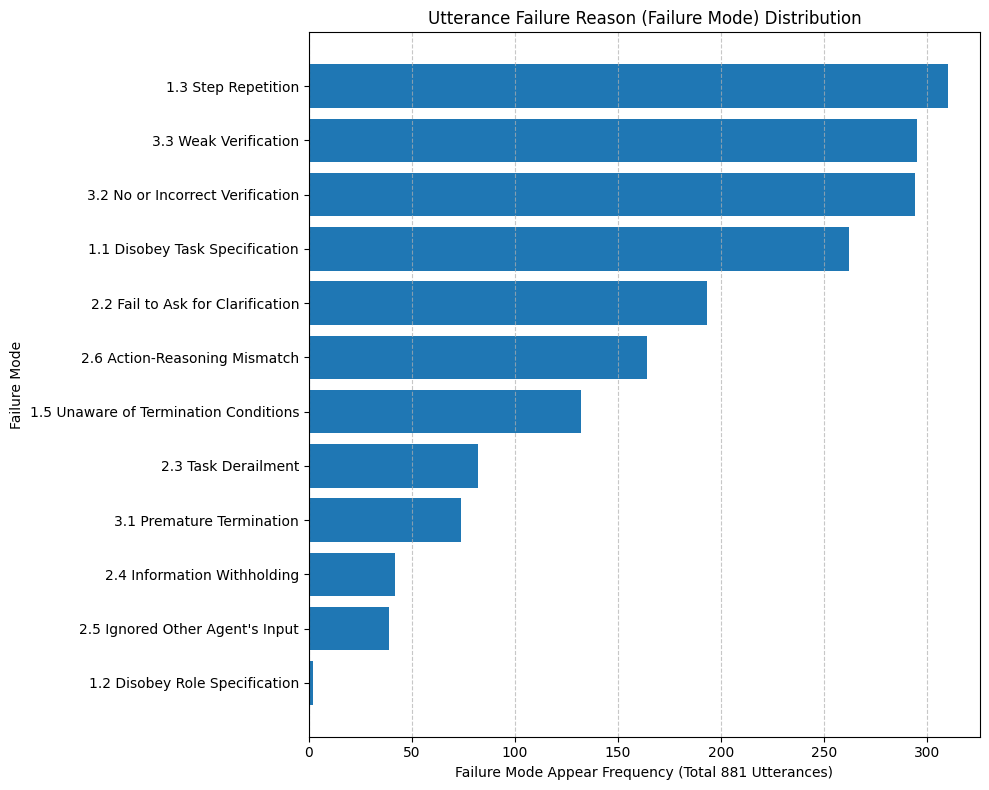

In [9]:
import matplotlib.pyplot as plt

# Sort by True Count for better readability
fm_summary_df_sorted = fm_summary_df.sort_values(by='True Count', ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(fm_summary_df_sorted['Failure Mode'], fm_summary_df_sorted['True Count'])

# Add titles and labels
plt.title('Utterance Failure Reason (Failure Mode) Distribution')
plt.xlabel(f"Failure Mode Appear Frequency (Total {len(df)} Utterances)")
plt.ylabel('Failure Mode')

# Optional: Add grid lines for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
# Calculate total of all valid (non-NaN) True Counts
total_true_count = fm_summary_df["True Count"].sum(skipna=True)

# Compute percentage of each True Count over total True Count
fm_summary_df["True Percentage"] = (fm_summary_df["True Count"] / total_true_count) * 100

# Round to one decimal place
fm_summary_df["True Percentage"] = fm_summary_df["True Percentage"].fillna(0.0).round(2)


In [30]:
fm_summary_df.head(20)

,Failure Mode,False Count,True Count,True Percentage
0,1.1 Disobey Task Specification,619.0,262.0,13.87
1,1.2 Disobey Role Specification,879.0,2.0,0.11
2,1.3 Step Repetition,571.0,310.0,16.41
3,1.4 Loss of Conversation History,881.0,NaN,0.00
4,1.5 Unaware of Termination Conditions,749.0,132.0,6.99
5,2.1 Conversation Reset,881.0,NaN,0.00
6,2.2 Fail to Ask for Clarification,688.0,193.0,10.22
7,2.3 Task Derailment,799.0,82.0,4.34
8,2.4 Information Withholding,839.0,42.0,2.22
9,2.5 Ignored Other Agent's Input,842.0,39.0,2.06


In [31]:
# Sum True Percentage for each failure mode group (starts with 1, 2, or 3)
sum_group_1 = fm_summary_df[fm_summary_df["Failure Mode"].str.startswith("1")]["True Percentage"].sum()
sum_group_2 = fm_summary_df[fm_summary_df["Failure Mode"].str.startswith("2")]["True Percentage"].sum()
sum_group_3 = fm_summary_df[fm_summary_df["Failure Mode"].str.startswith("3")]["True Percentage"].sum()  # Optional if group 3 exists

# Print results
print(f"Total True Percentage for group 1.x: {sum_group_1:.2f}%")
print(f"Total True Percentage for group 2.x: {sum_group_2:.2f}%")
print(f"Total True Percentage for group 3.x: {sum_group_3:.2f}%")

Total True Percentage for group 1.x: 37.38%
Total True Percentage for group 2.x: 27.52%
Total True Percentage for group 3.x: 35.10%


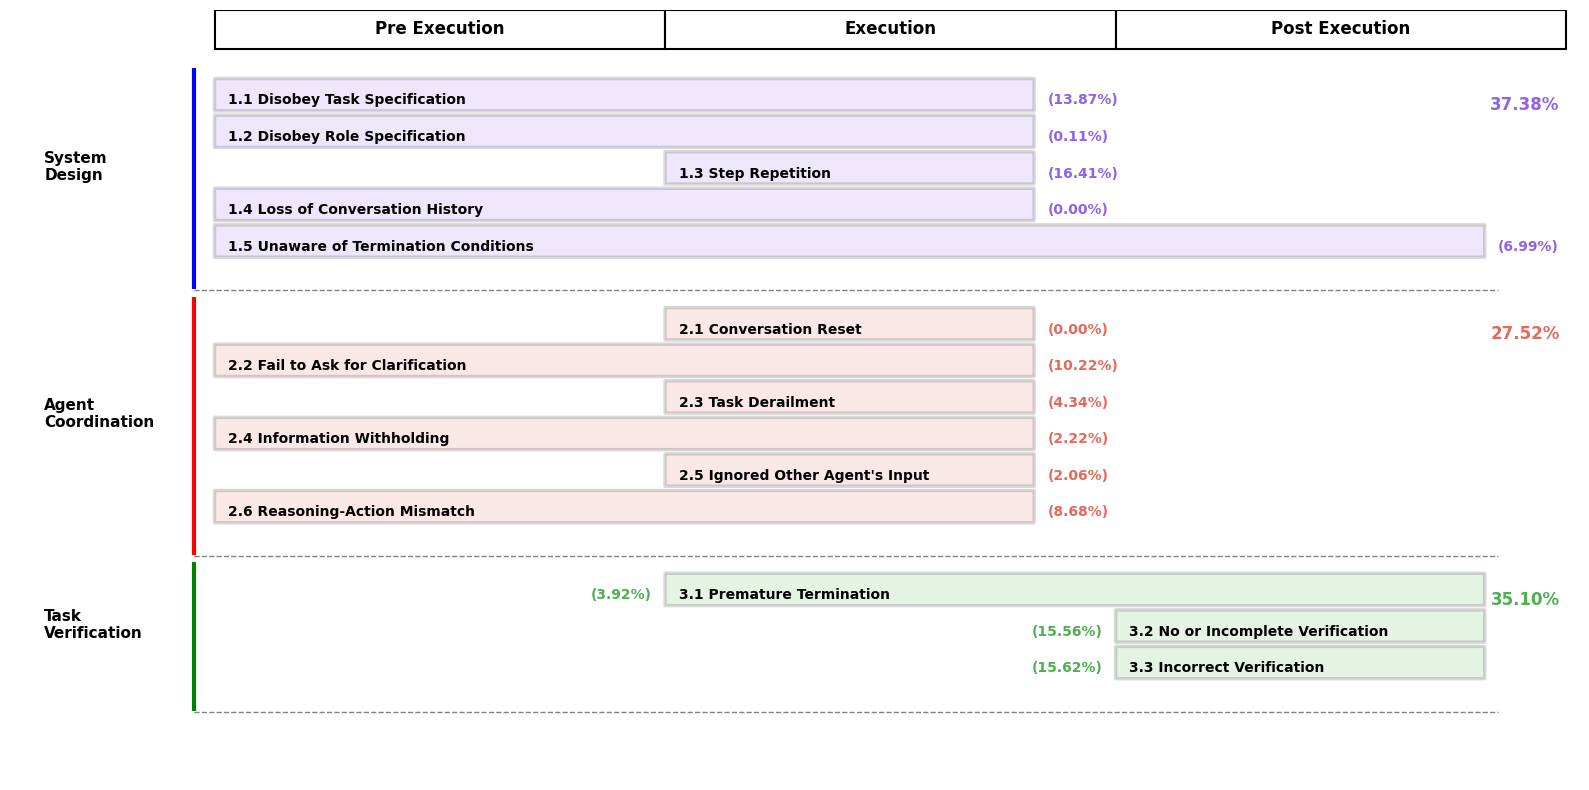

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_failure_analysis_plot_final_dashed():
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_xlim(0, 115)
    ax.set_ylim(0, 20)
    ax.axis('off')

    # Stage headers in bounded boxes
    stages = ['Pre Execution', 'Execution', 'Post Execution']
    stage_positions = [(15, 48), (48, 81), (81, 114)]

    for stage, (x_start, x_end) in zip(stages, stage_positions):
        ax.add_patch(patches.Rectangle((x_start, 19), x_end - x_start, 1,
                                       facecolor='white', edgecolor='black', linewidth=1.5))
        ax.text((x_start + x_end) / 2, 19.5, stage, fontsize=12,
                color='black', ha='center', va='center', weight='bold')

    # Category data
    categories = {
        "System\nDesign": {
            "color": "#8E63E7",
            "bar_color": "blue",
            "failures": [
                ("1.1 Disobey Task Specification", 13.87, 0, 1),
                ("1.2 Disobey Role Specification", 0.11, 0, 1),
                ("1.3 Step Repetition", 16.41, 1, 1),
                ("1.4 Loss of Conversation History", 0.00, 0, 1),
                ("1.5 Unaware of Termination Conditions", 6.99, 0, 2),
            ],
            "total": 37.38
        },
        "Agent\nCoordination": {
            "color": "#E4695C",
            "bar_color": "red",
            "failures": [
                ("2.1 Conversation Reset", 0.00, 1, 1),
                ("2.2 Fail to Ask for Clarification", 10.22, 0, 1),
                ("2.3 Task Derailment", 4.34, 1, 1),
                ("2.4 Information Withholding", 2.22, 0, 1),
                ("2.5 Ignored Other Agent's Input", 2.06, 1, 1),
                ("2.6 Reasoning-Action Mismatch", 8.68, 0, 1),
            ],
            "total": 27.52
        },
        "Task\nVerification": {
            "color": "#4CAF50",
            "bar_color": "green",
            "failures": [
                ("3.1 Premature Termination", 3.92, 1, 2),
                ("3.2 No or Incomplete Verification", 15.56, 2, 2),
                ("3.3 Incorrect Verification", 15.62, 2, 2),
            ],
            "total": 35.10
        }
    }

    y = 18
    box_height = 0.8
    spacing = 0.15

    for category, data in categories.items():
        num_failures = len(data["failures"])
        block_height = num_failures * (box_height + spacing)

        # Category label
        ax.text(2.5, y - block_height / 2 + 0.3, category,
                fontsize=11, weight='bold', va='center', ha='left', color='black')

        # Colored vertical line
        ax.vlines(13.5, y + 0.5, y - block_height - 0.5, color=data["bar_color"], linewidth=3)

        y -= 0.6

        for label, val, stage_start, stage_end in data["failures"]:
            x_start = 15 + stage_start * 33
            x_end = 15 + stage_end * 33 + 27
            width = x_end - x_start

            # Box
            ax.add_patch(patches.FancyBboxPatch(
                (x_start, y), width, box_height,
                boxstyle="round,pad=0.02",
                edgecolor='black',
                facecolor=data["color"], alpha=0.15, lw=2.5
            ))

            # Inside box: label
            ax.text(x_start + 1, y + 0.25, label, color='black', fontsize=10,
                    va='center', weight='bold')

            # Outside box: percentage (in color)
            if "Task" in category:
                ax.text(x_start - 1, y + 0.25, f"({val:.2f}%)", color=data["color"],
                        fontsize=10, ha='right', va='center', weight='bold')
            else:
                ax.text(x_end + 1, y + 0.25, f"({val:.2f}%)", color=data["color"],
                        fontsize=10, ha='left', va='center', weight='bold')

            y -= (box_height + spacing)

        # Total percentage on far right in color
        ax.text(113.5, y + block_height, f"{data['total']:.2f}%",
                color=data["color"], fontsize=12, weight='bold', ha='right')

        # Horizontal dashed line between groups
        ax.hlines(y + spacing / 2, xmin=13.5, xmax=109, linestyles='dashed',
                  linewidth=1, color='gray')

        y -= 0.6  # Bottom spacing

    return fig, ax

fig, ax = create_failure_analysis_plot_final_dashed()
plt.tight_layout()
plt.show()

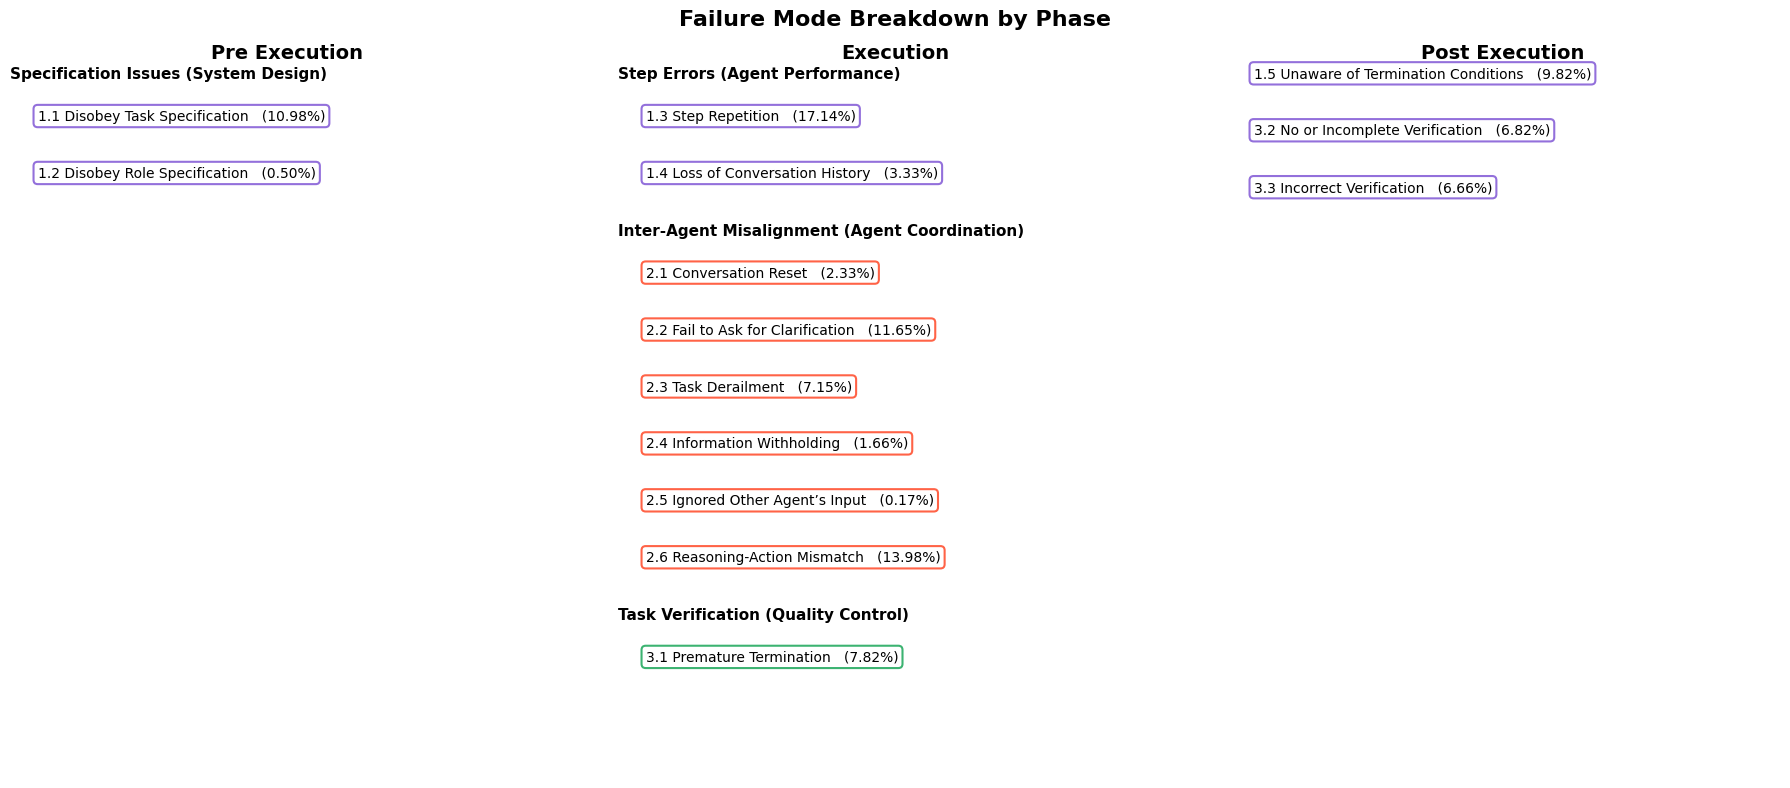

In [33]:
import matplotlib.pyplot as plt

# Sample structured data
layout = {
    "Pre Execution": {
        "Specification Issues (System Design)": [
            ("1.1 Disobey Task Specification", 10.98),
            ("1.2 Disobey Role Specification", 0.50),
        ]
    },
    "Execution": {
        "Step Errors (Agent Performance)": [
            ("1.3 Step Repetition", 17.14),
            ("1.4 Loss of Conversation History", 3.33),
        ],
        "Inter-Agent Misalignment (Agent Coordination)": [
            ("2.1 Conversation Reset", 2.33),
            ("2.2 Fail to Ask for Clarification", 11.65),
            ("2.3 Task Derailment", 7.15),
            ("2.4 Information Withholding", 1.66),
            ("2.5 Ignored Other Agent’s Input", 0.17),
            ("2.6 Reasoning-Action Mismatch", 13.98),
        ],
        "Task Verification (Quality Control)": [
            ("3.1 Premature Termination", 7.82)
        ]
    },
    "Post Execution": {
        "": [
            ("1.5 Unaware of Termination Conditions", 9.82),
            ("3.2 No or Incomplete Verification", 6.82),
            ("3.3 Incorrect Verification", 6.66)
        ]
    }
}

# Colors by group type (adjust as needed)
group_colors = {
    "Specification Issues (System Design)": "mediumpurple",
    "Step Errors (Agent Performance)": "mediumpurple",
    "Inter-Agent Misalignment (Agent Coordination)": "tomato",
    "Task Verification (Quality Control)": "mediumseagreen",
    "": "mediumpurple"
}

# Initialize figure
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
fig.subplots_adjust(wspace=0.4)

# Iterate through columns
for ax, (phase, groups) in zip(axs, layout.items()):
    ax.axis('off')
    ax.set_title(phase, fontsize=14, fontweight='bold')

    y = 1.0
    for group, items in groups.items():
        if group:
            ax.text(0, y, group, fontsize=11, fontweight='bold', va='top')
            y -= 0.06

        for label, percent in items:
            box_text = f"{label}   ({percent:.2f}%)"
            ax.text(0.05, y, box_text,
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor=group_colors.get(group, 'black'),
                              facecolor='none', linewidth=1.5),
                    fontsize=10, va='top')
            y -= 0.08

plt.suptitle("Failure Mode Breakdown by Phase", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


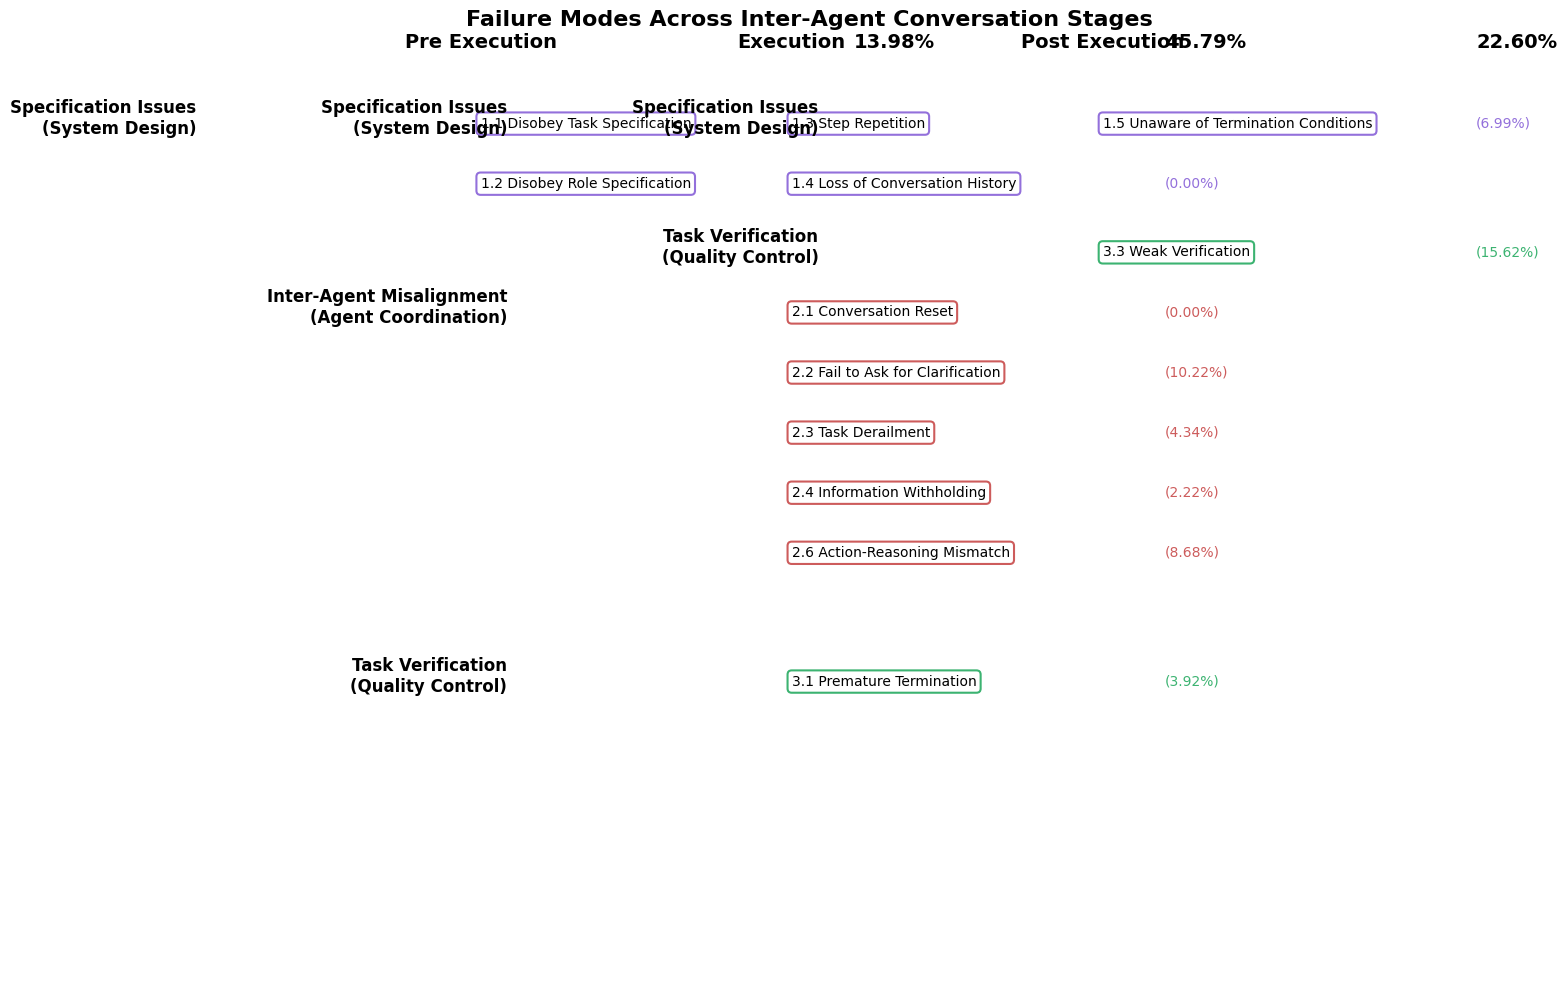

In [35]:
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

# --- START: Assuming you already have this DataFrame ---
# Example mock data if not yet defined
# Replace this with your actual fm_summary_df
# fm_summary_df = pd.DataFrame([...])
# Columns: ['Failure Mode', 'False Count', 'True Count']

# Step 1: Clean and compute percentage
fm_summary_df['True Count'] = fm_summary_df['True Count'].fillna(0)
total_true = fm_summary_df['True Count'].sum()
fm_summary_df['True %'] = fm_summary_df['True Count'] / total_true * 100

# Step 2: Failure mode metadata
failure_mode_meta = {
    "1.1 Disobey Task Specification": ("Pre Execution", "Specification Issues\n(System Design)", "mediumpurple"),
    "1.2 Disobey Role Specification": ("Pre Execution", "Specification Issues\n(System Design)", "mediumpurple"),
    "1.3 Step Repetition": ("Execution", "Specification Issues\n(System Design)", "mediumpurple"),
    "1.4 Loss of Conversation History": ("Execution", "Specification Issues\n(System Design)", "mediumpurple"),
    "1.5 Unaware of Termination Conditions": ("Post Execution", "Specification Issues\n(System Design)", "mediumpurple"),

    "2.1 Conversation Reset": ("Execution", "Inter-Agent Misalignment\n(Agent Coordination)", "indianred"),
    "2.2 Fail to Ask for Clarification": ("Execution", "Inter-Agent Misalignment\n(Agent Coordination)", "indianred"),
    "2.3 Task Derailment": ("Execution", "Inter-Agent Misalignment\n(Agent Coordination)", "indianred"),
    "2.4 Information Withholding": ("Execution", "Inter-Agent Misalignment\n(Agent Coordination)", "indianred"),
    "2.5 Ignored Other Agent’s Input": ("Execution", "Inter-Agent Misalignment\n(Agent Coordination)", "indianred"),
    "2.6 Action-Reasoning Mismatch": ("Execution", "Inter-Agent Misalignment\n(Agent Coordination)", "indianred"),

    "3.1 Premature Termination": ("Execution", "Task Verification\n(Quality Control)", "mediumseagreen"),
    "3.2 No or Incomplete Verification": ("Post Execution", "Task Verification\n(Quality Control)", "mediumseagreen"),
    "3.3 Weak Verification": ("Post Execution", "Task Verification\n(Quality Control)", "mediumseagreen"),
}

# Step 3: Structure the data
structured_data = defaultdict(lambda: defaultdict(list))
stage_totals = defaultdict(float)

for _, row in fm_summary_df.iterrows():
    mode = row['Failure Mode']
    pct = row['True %']
    if mode in failure_mode_meta:
        stage, group, color = failure_mode_meta[mode]
        structured_data[stage][group].append((mode, pct, color))
        stage_totals[stage] += pct

# Step 4: Plotting
fig, ax = plt.subplots(figsize=(18, 10))
ax.axis('off')

stage_x = {"Pre Execution": 0.15, "Execution": 0.5, "Post Execution": 0.85}
group_vertical_offset = 0.07  # space between modes
stage_y_start = 1.0
group_spacing = 0.08  # extra spacing between groups

for stage, group_dict in structured_data.items():
    x = stage_x[stage]
    y = stage_y_start

    for group, modes in group_dict.items():
        # Draw group label
        ax.text(x - 0.32, y + 0.02, group, fontsize=12, fontweight='bold', ha='right', va='top')

        # Draw each failure mode
        for mode, pct, color in modes:
            label = f"{mode}"
            percent_label = f"({pct:.2f}%)"

            ax.text(x, y, label,
                    fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor=color, facecolor='white', linewidth=1.5),
                    ha='left', va='top')

            ax.text(x + 0.42, y, percent_label,
                    fontsize=10, color=color, ha='left', va='top')

            y -= group_vertical_offset

        y -= group_spacing  # extra space after each group

# Stage headers and totals
for stage, x in stage_x.items():
    ax.text(x, 1.08, stage, fontsize=14, fontweight='bold', ha='center')
    total = stage_totals[stage]
    ax.text(x + 0.42, 1.08, f"{total:.2f}%", fontsize=14, fontweight='bold', color="black", ha='left')

plt.suptitle("Failure Modes Across Inter-Agent Conversation Stages", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [7]:
print(list(df.columns))

['model_id', 'counter', 'timestamp', 'vendor', 'model', 'ut_id', 'addi_fm_cnt', 'addi_fm_list', '1.1 Disobey Task Specification', '1.2 Disobey Role Specification', '1.3 Step Repetition', '1.4 Loss of Conversation History', '1.5 Unaware of Termination Conditions', '2.1 Conversation Reset', '2.2 Fail to Ask for Clarification', '2.3 Task Derailment', '2.4 Information Withholding', "2.5 Ignored Other Agent's Input", '2.6 Action-Reasoning Mismatch', '3.1 Premature Termination', '3.2 No or Incorrect Verification', '3.3 Weak Verification']
